**Import Libraries**

In [25]:
import os
import zipfile
from glob import glob

# Data Manipulation Libraries
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 1: Load Data**

In [26]:
# Paths
ZIP_PATH = '/cluster/home/bjorneme/projects/Data/vinbigdata-chest-xray-abnormalities-detection.zip'
EXTRACTED_PATH = '/cluster/home/bjorneme/projects/Data/vinbigdata-chest-xray-abnormalities-detection-extracted'

In [27]:
def extract_data(zip_path, extracted_path):
    """
    Extracts the ZIP file of the dataset.
    """
    os.makedirs(extracted_path, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path)
    print(f"Data extracted to {extracted_path}")

# Uncomment the line below to extract data (if not already extracted)
# extract_data(ZIP_PATH, EXTRACTED_PATH)

# **Step 2: Data Preprocessing**

In [28]:
# Define Disease Labels
disease_labels = [
    "Aortic enlargement",
    "Atelectasis",
    "Calcification",
    "Cardiomegaly",
    "Consolidation",
    "ILD",
    "Infiltration",
    "Lung Opacity",
    "Nodule/Mass",
    "Other lesion",
    "Pleural effusion",
    "Pleural thickening",
    "Pneumothorax",
    "Pulmonary fibrosis"
]

def load_labels(csv_path, image_path):
    """
    Loads and preprocesses the labels from the CSV file.
    Maps each image to its corresponding file path and binary labels for each disease.
    """

    # Read the CSV file containing labels
    labels_df = pd.read_csv(csv_path)

    # Create binary columns for each disease label
    for disease in disease_labels:
        labels_df[disease] = labels_df['class_name'].str.contains(disease).astype(int)

    # Create a binary column for 'No Finding'
    labels_df['No finding'] = labels_df['class_name'].apply(lambda x: 1 if 'No finding' in x else 0)

    # Map image filenames to their full paths
    image_paths = glob(os.path.join(image_path, '**', 'images', '*.png'), recursive=True)
    img_path_dict = {os.path.basename(path): path for path in image_paths}

    # Add the full image path to the dataframe
    labels_df['Path'] = labels_df['image_id'].map(lambda x:os.path.join('/kaggle/input/vinbigdata-chest-xray-original-png/train', str(x)+'.png'))
    
    return labels_df

# Path to the labels CSV file
labels_csv_path = os.path.join(EXTRACTED_PATH, 'train.csv')

# Load and preprocess the labels
labels_df = load_labels(labels_csv_path, EXTRACTED_PATH)

**Print Dataframe**

In [29]:
labels_df.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,Aortic enlargement,Atelectasis,...,Infiltration,Lung Opacity,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis,No finding,Path
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,1,/kaggle/input/vinbigdata-chest-xray-original-p...
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,1,/kaggle/input/vinbigdata-chest-xray-original-p...
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,0,0,...,0,0,0,0,0,0,0,0,0,/kaggle/input/vinbigdata-chest-xray-original-p...
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,1,0,...,0,0,0,0,0,0,0,0,0,/kaggle/input/vinbigdata-chest-xray-original-p...
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,1,/kaggle/input/vinbigdata-chest-xray-original-p...


# **Step 3: Exploratory Data Analysis (EDA)**

**Number of Unique Patients**

In [30]:
unique_patients = labels_df['image_id'].nunique()
print(f"Number of Unique Patients: {unique_patients}")

Number of Unique Patients: 15000


**Distribution of Disease Label**

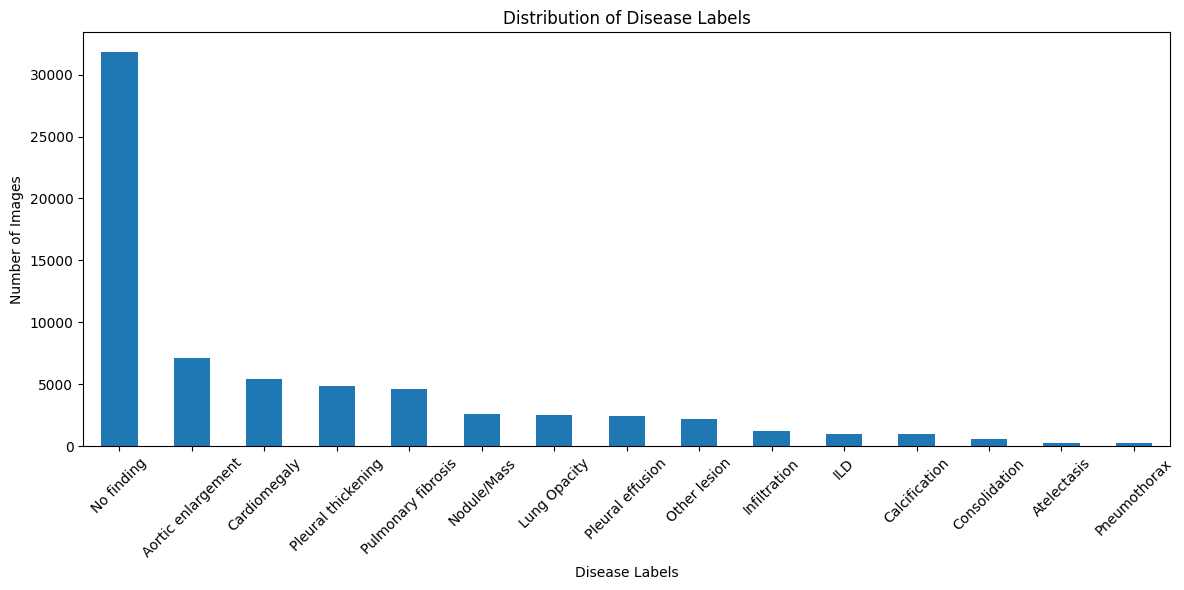

In [31]:
# Sum counts of disease labels including 'No_Finding' and sort them
label_counts = labels_df[disease_labels + ['No finding']].sum().sort_values(ascending=False)

# Plot the distribution
label_counts.plot(kind='bar', figsize=(12, 6), title="Distribution of Disease Labels", rot=45)
plt.xlabel("Disease Labels")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

**Distribution of Patient Age**

In [ ]:
# TODO

**Distribution of Patient Gender**

In [ ]:
# TODO

**Distribution of View Position**

In [ ]:
# TODO

**Visualize Samples with Bounding Boxes**

In [ ]:
# TODO